In [16]:
import numpy as np
import math
import time
from datetime import datetime, timezone
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [21]:
heart_rates = pd.read_csv('heart_rates.csv', parse_dates=['time'])
accelerations = pd.read_csv('accelerations.csv', parse_dates=['time'])
labels = pd.read_csv('labels.csv', parse_dates=['time'])

In [20]:
print(heart_rates.head())
print(accelerations.head())

                           time  heart_rate     ID
0 2023-12-10 22:06:32.478399992    0.550562  46343
1 2023-12-10 22:06:42.478399992    0.651685  46343
2 2023-12-10 22:06:46.478399992    0.674157  46343
3 2023-12-10 22:06:49.478399992    0.674157  46343
4 2023-12-10 22:06:55.478399992    0.674157  46343
                 time         x         y         z       ID
0 2023-12-10 22:06:30  0.298920  0.968821  0.452466  46343.0
1 2023-12-10 22:06:31  0.285728  0.915542  0.385316  46343.0
2 2023-12-10 22:06:32  0.277026  0.890772  0.285245  46343.0
3 2023-12-10 22:06:33  0.259930  0.906690  0.461052  46343.0
4 2023-12-10 22:06:34  0.303545  0.937795  0.453302  46343.0


In [24]:
df = pd.DataFrame()

for idx, (subject_id, subject_accelerations) in enumerate(accelerations.groupby('ID')):
    subject_hr = heart_rates[heart_rates['ID'] == subject_id]
    subject_labels = labels[labels['ID'] == subject_id]
    
    subject_accelerations = subject_accelerations.sort_values('time')
    subject_hr = subject_hr.sort_values('time')
    subject_lables = subject_labels.sort_values('time')
    
    merged = pd.merge_asof(subject_accelerations, subject_hr, on ='time', direction='nearest')
    merged = pd.merge_asof(merged, subject_labels, on='time', direction='nearest')
    df = pd.concat([df, merged], ignore_index=True)

df = df.drop(columns=['ID_y', 'ID_x'])

In [25]:
print(len(accelerations))
print(len(df))
print(accelerations.head())
print(df.head(20))

758734
758734
                 time         x         y         z       ID
0 2023-12-10 22:06:30  0.298920  0.968821  0.452466  46343.0
1 2023-12-10 22:06:31  0.285728  0.915542  0.385316  46343.0
2 2023-12-10 22:06:32  0.277026  0.890772  0.285245  46343.0
3 2023-12-10 22:06:33  0.259930  0.906690  0.461052  46343.0
4 2023-12-10 22:06:34  0.303545  0.937795  0.453302  46343.0
                  time         x         y         z  heart_rate  sleep     ID
0  2023-12-10 22:06:30  0.298920  0.968821  0.452466    0.550562      0  46343
1  2023-12-10 22:06:31  0.285728  0.915542  0.385316    0.550562      0  46343
2  2023-12-10 22:06:32  0.277026  0.890772  0.285245    0.550562      0  46343
3  2023-12-10 22:06:33  0.259930  0.906690  0.461052    0.550562      0  46343
4  2023-12-10 22:06:34  0.303545  0.937795  0.453302    0.550562      0  46343
5  2023-12-10 22:06:35  0.255207  0.875414  0.291011    0.550562      0  46343
6  2023-12-10 22:06:36  0.232126  0.828683  0.236661    0.550562   

In [27]:
df.to_csv('train_data.csv', index=False)

<ipython-input-26-5f4b3b3a6e24>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


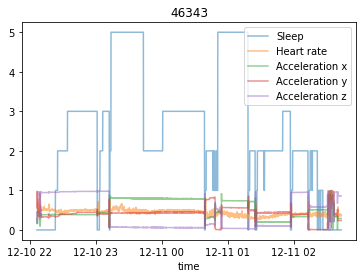

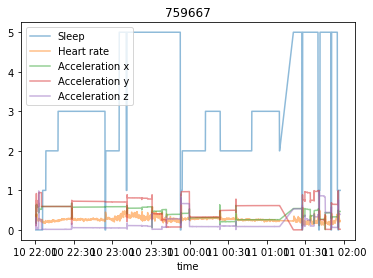

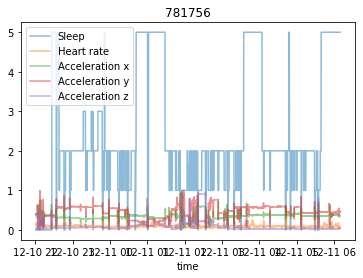

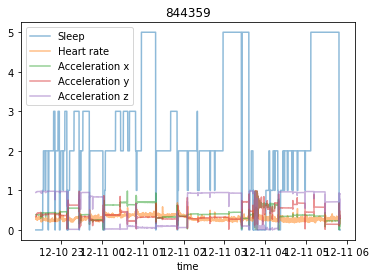

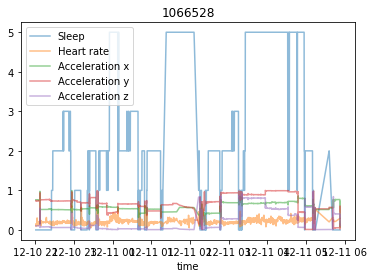

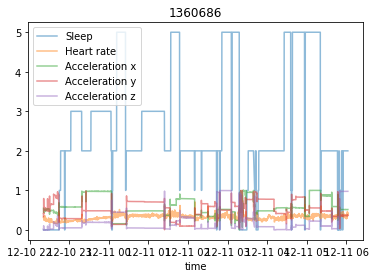

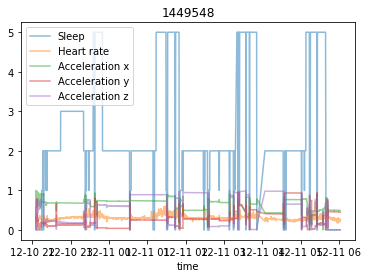

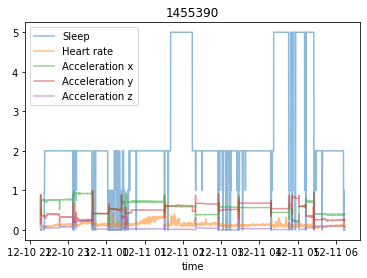

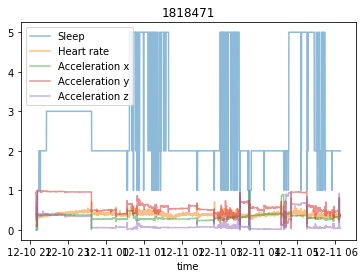

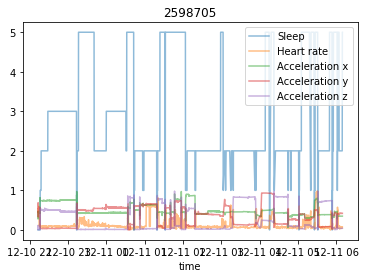

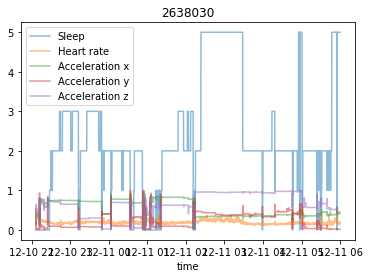

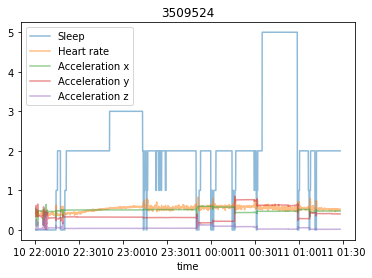

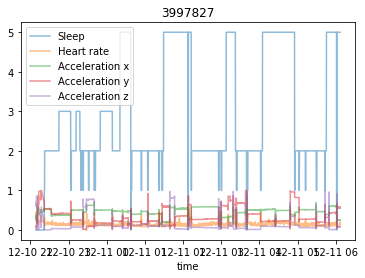

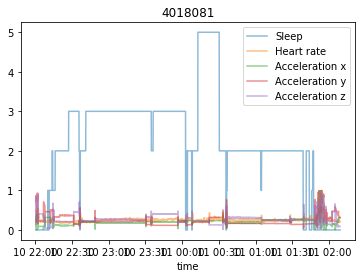

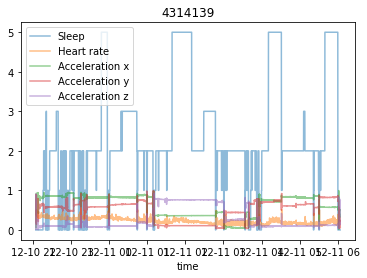

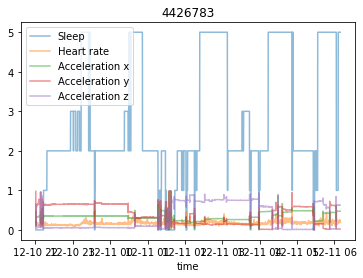

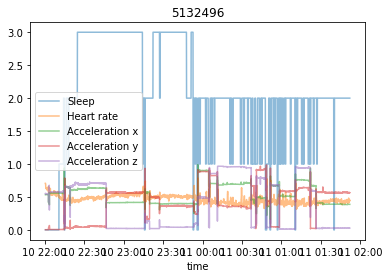

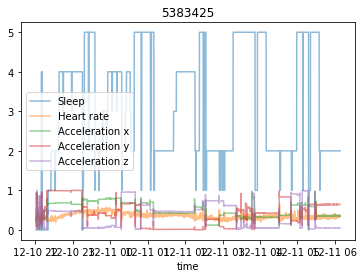

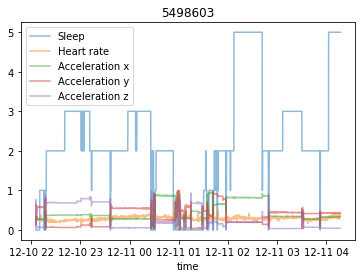

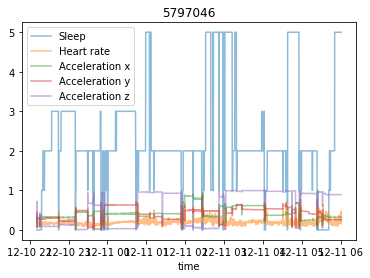

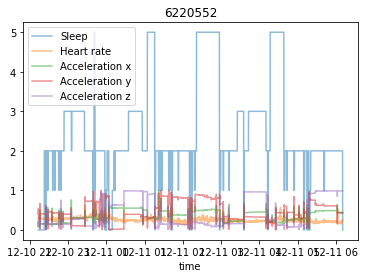

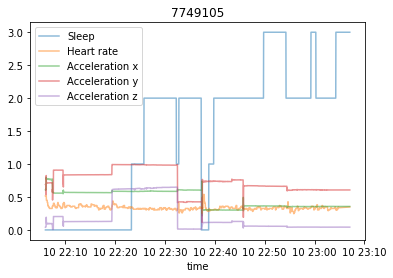

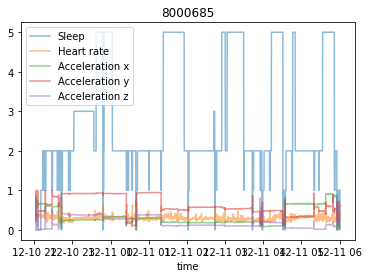

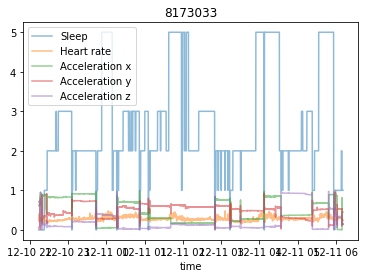

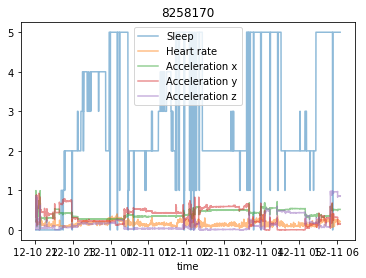

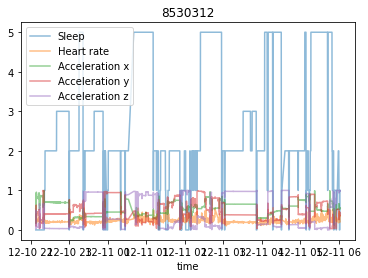

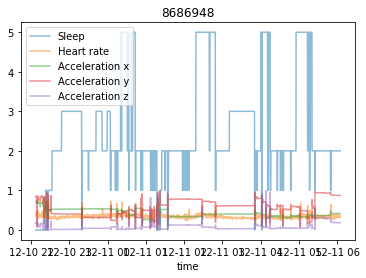

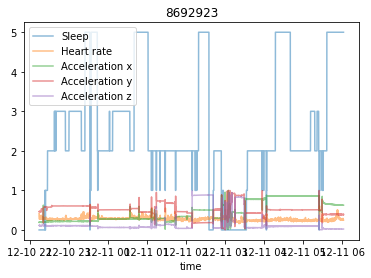

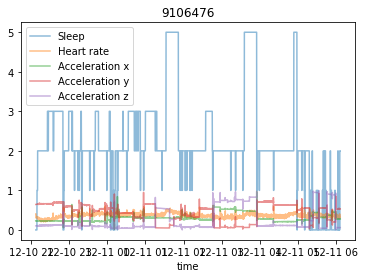

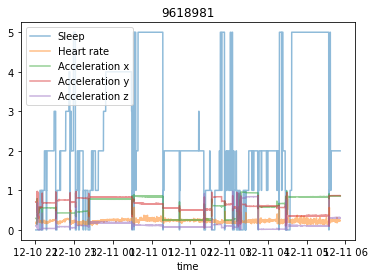

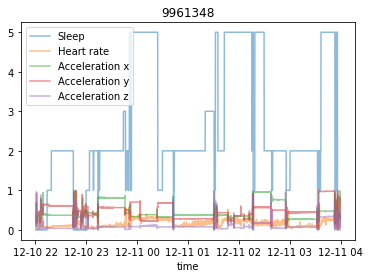

In [26]:
for _, (subject_id, data) in enumerate(df.groupby('ID')):
    plt.figure()
    plt.plot(data['time'], data['sleep'], label='Sleep', alpha=0.5)
    plt.plot(data['time'], data['heart_rate'], label='Heart rate', alpha=0.5)
    plt.plot(data['time'], data['x'], label='Acceleration x', alpha=0.5)
    plt.plot(data['time'], data['y'], label='Acceleration y', alpha=0.5)
    plt.plot(data['time'], data['z'], label='Acceleration z', alpha=0.5)
    plt.xlabel('time')
    plt.title(subject_id)
    plt.legend()

plt.show()

In [ ]:
781756